## Load in Serialized values

In [1]:
import pickle 
import pandas as pd
import json

inp_data = pd.read_csv('serialize/inp_data.csv')

with open('serialize/x.pickle', 'rb') as out:
    x = pickle.load(out)

with open('serialize/x_2g.pickle', 'rb') as out:
    x_2g = pickle.load( out)

with open('serialize/normalized_x.pickle', 'rb') as out:
    normalized_x = pickle.load(out)

with open('serialize/normalized_x2g.pickle', 'rb') as out:
    normalized_x2g = pickle.load(out)

with open('serialize/vocabulary.json', 'r') as out:
    cv_vocabulary_ = json.load(out)
    
with open('serialize/vocabulary_2g.json', 'r') as out:
    cv_2grams_vocabulary_ = json.load(out)

## Use Tf-idf cosine similarity for MDS, and visualize

In [2]:
normalized_x2g.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0327315 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01286486, ..., 0.        , 0.01833448,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [3]:
std_norm_2g = (normalized_x2g - normalized_x2g.mean(axis=0)) / normalized_x2g.A.std(axis=0)

In [4]:
inp_data.coordinator_name.explode().value_counts()

['Comunità Valle Brembana', 'Province of Bergamo']                                                                                                                                                                                                                                                                                                                                                                                               15
Province of Alicante                                                                                                                                                                                                                                                                                                                                                                                                                              8
Province of Padova                                                                                                              

In [5]:
def get_coordin8r(coord):
    m = [
        'Province of Bergamo',
        'Region of Sardinia',                                                            
        'Province of Alicante',                                                           
        'Climate Alliance, DE',                                                          
        'Regione Emilia-Romagna',                                                          
        'Provincie Vlaams-Brabant',                                                        
        'Region of Friuli Venezia Giulia',
        'Network of Sustainable Greek Islands, GR']
    if isinstance(coord, list) or isinstance(coord, str):
        for x in m:
            if x in coord:
                return x
    else:
        return 'N/A' 
         
inp_data['clean_coordinator'] = inp_data.coordinator_name.apply(get_coordin8r)

/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


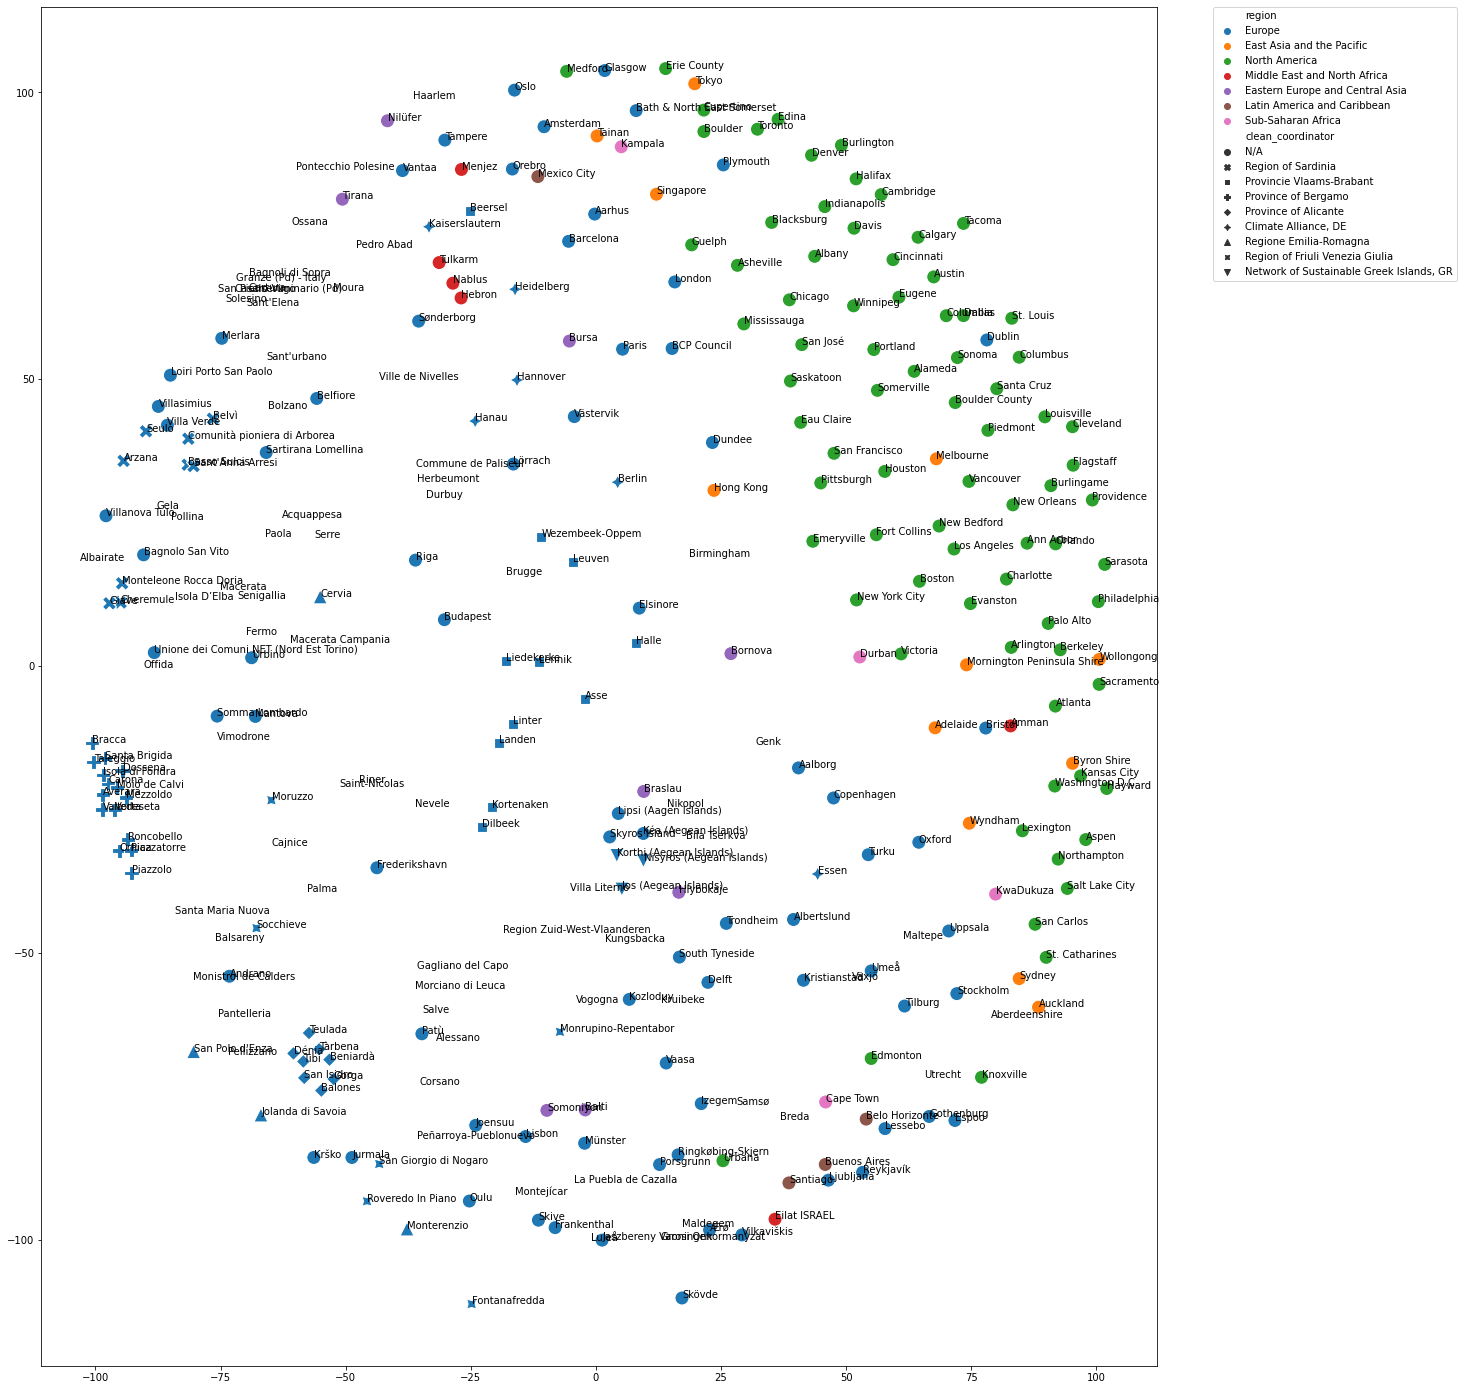

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

euc_dists = euclidean_distances(std_norm_2g)
mds = MDS(dissimilarity='precomputed', random_state=10)
mds_x = mds.fit_transform(euc_dists)
fig, ax =plt.subplots(figsize=(20, 25))
sns.scatterplot(
    mds_x[:, 0], 
    mds_x[:, 1], 
    hue=inp_data['region'], 
    style=inp_data['clean_coordinator'],
    s=200
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for  point, city in zip(mds_x, inp_data['city_name']):
    ax.text(point[0]+.02, point[1]+0.02, str(city))

## Save Raw data for export

In [7]:
sim_graph_data = pd.concat([
    pd.Series(mds_x[:, 0]),
    pd.Series(mds_x[:, 1]),
    pd.Series(inp_data['city_name'].tolist()),
    pd.Series(inp_data['region'].tolist())
], axis=1)
sim_graph_data.columns = ['x', 'y', 'city', 'region']
sim_graph_data

,x,y,city,region
0,40.474380,-17.798491,Aalborg,Europe
1,-0.247802,78.746691,Aarhus,Europe
2,78.983898,-61.311684,Aberdeenshire,Europe
3,-62.681760,25.750234,Acquappesa,Europe
4,67.779365,-10.808371,Adelaide,East Asia and the Pacific
...,...,...,...,...
312,-10.889565,22.481048,Wezembeek-Oppem,Europe
313,51.485854,62.751317,Winnipeg,North America
314,100.570581,1.124520,Wollongong,East Asia and the Pacific
315,74.612453,-27.439997,Wyndham,East Asia and the Pacific


In [8]:
sim_graph_data.to_csv('similarity_graph_data.csv')